 ## 9. Trigonometry

In [62]:
from spb import (
    plot,
    plot_geometry,
    plot_parametric
)
from sympy import (
    Circle,
    cos,
    Eq,
    Ge,
    pi,
    Point,
    Segment,
    sin,
    sqrt,
    Symbol,
    Triangle
)
from sympy.vector import CoordSys3D

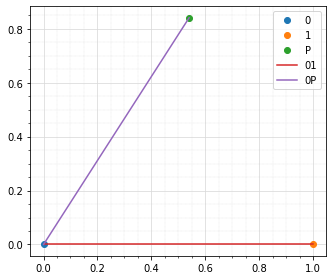

In [63]:
theta = Symbol('θ', real=True)

p0 = Point(0, 0)
p1 = Point(1, 0)

x = cos(theta)
y = sin(theta)
pP = Point(x, y)

plot_geometry(
    (p0, '0'),
    (p1, '1'),
    (pP.subs(theta, 1), 'P'),
    (Segment(p0, p1), '01'),
    (Segment(p0, pP.subs(theta, 1)), '0P')
)

In [64]:
id0 = Eq(cos(theta)**2 + sin(theta)**2, 1)
id0

Eq(sin(θ)**2 + cos(θ)**2, 1)

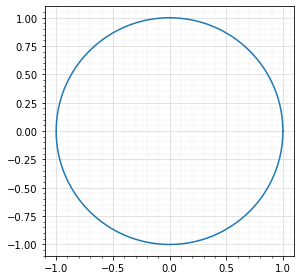

In [65]:
plot_parametric(
    cos(theta),
    sin(theta),
    (theta, 0, 2*pi),
    aspect='equal',
    use_cm=False
)

 > . . . there are really two legally different functions: The Sine of a *number*, here with capital S, and the sine of an angle, with lower case s. This pedantic (but real!) difference is usually ignored.

In [66]:
t = Symbol('t', real=True)

Eq(sin(t + 2*pi), sin(t))

True

In [67]:
Eq(cos(t + 2*pi), cos(t))

True

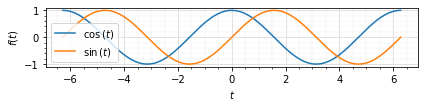

In [68]:
plot(
    cos(t),
    sin(t),
    (t, -2*pi, 2*pi),
    aspect='equal'
)

In [69]:
p10 = Point(1, 0)
p01 = Point(0, 1)

pQ = Point(3, 3)

Eq(pQ, pQ.x*p10 + pQ.y*p01)

True

In [70]:
def rotation(p, theta):
    x0 = p.x
    y0 = p.y
    x1 = x0*cos(theta) - y0*sin(theta)
    y1 = x0*sin(theta) + y0*cos(theta)
    return Point(x1, y1)

rotation(p10, pi)

Point2D(-1, 0)

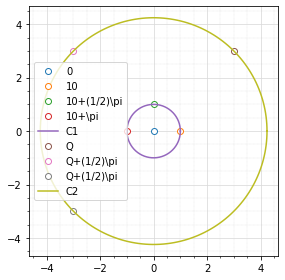

In [71]:
plot_geometry(
    (p0, '0'),
    (p10, '10'),
    (rotation(p10, pi/2), '10+(1/2)\pi'),
    (rotation(p10, pi), '10+\pi'),
    (Circle(Point(0, 0), 1), 'C1'),
    (pQ, 'Q'),
    (rotation(pQ, pi/2), 'Q+(1/2)\pi'),
    (rotation(pQ, pi), 'Q+(1/2)\pi'),
    (Circle(Point(0, 0), sqrt(18)), 'C2'),
    aspect='equal',
    is_filled=False,
    use_latex=True
)

In [72]:
phi = Symbol('ϕ', real=True)
phi_temp = pi/4

pQ0 = rotation(p10, phi)
pQ0 = pQ0.subs(phi, phi_temp)
pQ0

Point2D(sqrt(2)/2, sqrt(2)/2)

In [73]:
x, y = pQ0.args

Eq(x, cos(phi_temp))

True

In [74]:
Eq(y, sin(phi_temp))

True

In [75]:
theta_temp = pi/2

pQ1 = rotation(pQ0, theta)
pQ1 = pQ1.subs(theta, theta_temp)
pQ1

Point2D(-sqrt(2)/2, sqrt(2)/2)

In [76]:
cos_lhs = cos(phi + theta)
cos_rhs = cos(phi)*cos(theta) - sin(phi)*sin(theta)

Eq(cos_lhs, cos_rhs)

Eq(cos(θ + ϕ), -sin(θ)*sin(ϕ) + cos(θ)*cos(ϕ))

In [77]:
Eq(cos_lhs, cos_rhs).subs({phi: phi_temp, theta: theta_temp})

True

In [78]:
sin_lhs = sin(phi + theta)
sin_rhs = cos(phi)*sin(theta) - sin(phi)*cos(theta)

Eq(sin_lhs, sin_rhs)

Eq(sin(θ + ϕ), sin(θ)*cos(ϕ) - sin(ϕ)*cos(θ))

In [79]:
Eq(sin_lhs, sin_rhs).subs({phi: phi_temp, theta: theta_temp})

True

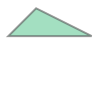

In [80]:
pA = Point(1, 1)
pB = Point(3, 0)
t0AB = Triangle(p0, pA, pB)
t0AB

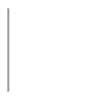

In [81]:
AM = t0AB.altitudes[pA]
AM

In [82]:
M = [x for x in AM.intersection(t0AB) if x != pA].pop()
M

Point2D(1, 0)

In [83]:
t_theta = t0AB.angles[p0]
t_theta

pi/4

In [84]:
t_phi = t0AB.angles[pB]
t_phi

acos(2*sqrt(5)/5)

In [85]:
b, c, a = [x.length for x in t0AB.sides]

Eq(AM.length, b * sin(t_theta))

True

In [86]:
Eq(AM.length, c * sin(t_phi))

True

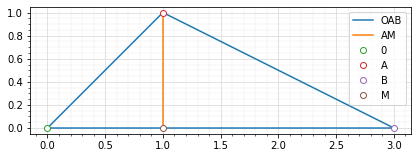

In [87]:
plot_geometry(
    (t0AB, 'OAB'),
    (AM, 'AM'),
    (p0, '0'),
    (pA, 'A'),
    (pB, 'B'),
    (M, 'M'),
    aspect='equal',
    is_filled=False
)

In [88]:
los_lhs = b / c
los_rhs = sin(t_phi) / sin(t_theta)
law_of_sines = Eq(los_lhs, los_rhs)
law_of_sines

True

In [89]:
Eq(c**2, (b*sin(t_theta))**2 + (a - b*cos(t_theta))**2)

True

In [90]:
Eq(c**2, a**2 + b**2 - 2*a*b*cos(t_theta))

True

In [91]:
inner_prod = a*b*cos(t_theta)
inner_prod

3

In [92]:
Eq(inner_prod, pA.x*pB.x + pA.y*pB.y)

True

In [93]:
V = CoordSys3D('V')

u = V.i + V.j
v = V.i + V.j
v1 = V.i + V.j
v2 = V.i + V.j

def inner_product(vec1, vec2):
    lhs = vec1.components[V.i]*vec2.components[V.i]
    rhs = vec1.components[V.j]*vec2.components[V.j]
    return lhs + rhs

t1 = Symbol('t_1', real=True)
t2 = Symbol('t_2', real=True)

Eq(
    inner_product(u, (t1*v1 + t2*v2)),
    t1*inner_product(u, v1) + t2*inner_product(u, v2)
)

True

In [94]:
Eq(inner_product(u, v), inner_product(v, u))

True

In [95]:
Ge(inner_product(u, u), 0)

True